# Distribuciones de las muestras

**Proposición**

Si $Z$ es una variable normal $N(0,1)$, entonces $Z^2$ tiene distribución ji cuadrada con un grado de libertad, esto se denota como $Z^2 \sim \chi_{1}^{2}$.

**Proposición(Suma de variables normales)**

Suponga que $X_1, \ldots, X_n$  son variables aleatorias independientes tal que $X_i \sim N(\mu_i, \sigma_i)$. Entonces $\sum_{i=1}^{n} X_i \sim N(\mu, \sigma^2)$, en donde $\mu = \sum_{i=1}^{n} \mu_i$ y $\sigma^2 = \sum_{i=1}^{n} \sigma_{i}^2$.

**Teorema**
1. Si $X_1, \ldots, X_n$ son variables independientes y con la misma distribución $N(\mu, \sigma^2)$, entonces

$$
\bar{X} = \dfrac{1}{n}\sum_{i=1}^{n} X_i \sim N\left(\mu, \dfrac{1}{n}\sigma^2\right)
$$

$$
\sum_{i=1}^{n} X_i \sim N\left(n\mu, n\sigma^2\right)
$$

2. Si $X_1, \ldots, X_n$ son variables independientes y con la misma distribución $Gama(\alpha, \beta)$, entonces 

$$
\sum_{i=1}^{n} X_i \sim Gama\left(n\alpha, \beta\right)
$$

3. Si $X_i$ tiene distribución $Gama\left(\dfrac{1}{2}\nu_i,2\right)$ (equivalente a una distribución $\chi_{\nu_i}^2$), entonces

$$
\sum_{i=1}^{n} X_i \sim Gama\left(\dfrac{1}{2}\nu, 2\right)~\sim \chi_{\nu}^2
$$

en donde $\nu = \sum_{i=1}^n$

**Teorema**

Suponga que se tienen $X_1, \ldots, X_n$ variables aleatorias independientes con distribución $N(\mu, \sigma^2)$. Entonces:

1. $\bar{X} = \dfrac{1}{n} \sum_{i=1}^n X_i$ y $S^2 = \dfrac{1}{n-1} \sum_{i=1}^{n}\left(X_i - \bar{X} \right)^2$ son variables independientes.

2. $\bar{X} \sim N\left(\mu, \dfrac{1}{n} \sigma^2\right)$, $\dfrac{(n-1)S^2 }{\sigma^2}\sim\chi_{n-1}^2$.

**Distribución t de Student**

Suponga que $X$ es una variable con distribución $N(0,1)$ y que $Y$ tiene distribución $\chi_{v}^2$, suponga además que $X$ y $Y$ son independientes. Entonces se dice que la variable

$$
W = \dfrac{ X }{ \sqrt{ \dfrac{Y} {v} } }.
$$

tiene distribución t de Student con $v$ grados de libertad.


**Distribución F**

Sean $X \sim \chi_{v_1}^2$ y $Y \sim \chi_{v_2}^2$ variables independientes. Entonces se dice que la variable

$$
U = \dfrac{ \dfrac{X}{v_1} } { \dfrac{Y}{v_2} }
$$

tiene distribución $F_{v_1}{v_2}$.

**Definición(Función de distribución empírica)**

Sea $X_1,\ldots,X_n$ una muestra de variables aleatorias independientes e identicamente distribuidas, la **función de distribución acumulada empírica** se define como

$$
\hat{F}_n(t) = \dfrac{| \{x_i: x_i \leq t \} |}{n} = \dfrac{1}{n} \sum_{i=1}^{n} \mathbb{1}(x_i \leq t)
$$


**Ejercicio**

Utilizando la **función de distribución acumulada empírica**, verifique gráficamente que 

1. Si $X_1, \ldots, X_n$ son variables independientes y con la misma distribución $N(\mu, \sigma^2)$, entonces

$$
\bar{X} = \dfrac{1}{n}\sum_{i=1}^{n} X_i \sim N\left(\mu, \dfrac{1}{n}\sigma^2\right)
$$

**Sugerencia**
```python
from statsmodels.distributions.empirical_distribution import ECDF
```


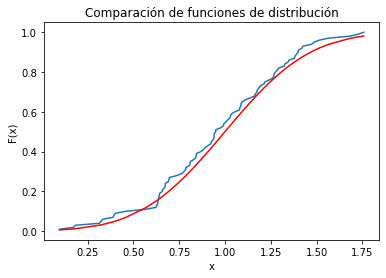

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
np.random.seed(54321)

#Número de muestras de una normal
n_muestras = 100

#Tamaño de la muestra
size_muestra = 30

#parámetros
mu = 1
sig = 2

#Muestras de una normal(mu, sigma^2)
x = norm.rvs(loc = mu, scale = sig, size = (n_muestras, size_muestra))

#Calcula el promedio de cada muestra
x_barra = x.mean(axis = 1)

#Funciones de distribución empíricas
ecdf_aprox = ECDF(x_barra)
#Se ordena para graficar correctamente
x_barra.sort()
cdf_true = norm.cdf(x_barra,loc = mu, scale = sig * 1.0 / np.sqrt(size_muestra))

plt.plot(x_barra, ecdf_aprox.y[1:], '-')
plt.plot(x_barra, cdf_true, '-r')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Comparación de funciones de distribución')
plt.show()
